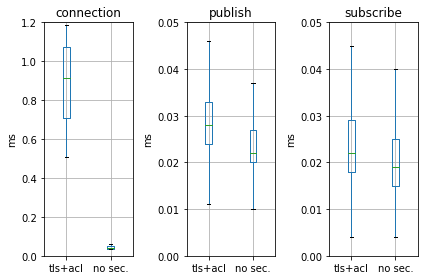

In [152]:
import pandas as pd
import matplotlib

d = {'connect_wsec_ms': [], 'publish_wsec_ms': [], 'subscribe_wsec_ms': [], 'connect_nosec_ms': [], 'publish_nosec_ms': [], 'subscribe_nosec_ms': []}

file = open('server_time_sec.log', 'r')
lines = file.read().splitlines()
file.close()

for line in lines:
    if not line:
        continue
    if 'handle__connect::' in line:
        time_s=float(line.split(':')[3].replace(' s', ''))
        d['connect_wsec_ms'].append(time_s*1000);
    if 'handle__publish::' in line:        
        time_s=float(line.split(':')[3].replace(' s', ''))
        d['publish_wsec_ms'].append(time_s*1000);
    if 'handle__subscribe::' in line:        
        time_s=float(line.split(':')[3].replace(' s', ''))
        d['subscribe_wsec_ms'].append(time_s*1000);

file = open('server_time_nosec.log', 'r')
lines = file.read().splitlines()
file.close()

for line in lines:
    if not line:
        continue
    if 'handle__connect::' in line:
        time_s=float(line.split(':')[3].replace(' s', ''))
        d['connect_nosec_ms'].append(time_s*1000);
    if 'handle__publish::' in line:        
        time_s=float(line.split(':')[3].replace(' s', ''))
        d['publish_nosec_ms'].append(time_s*1000);
    if 'handle__subscribe::' in line:        
        time_s=float(line.split(':')[3].replace(' s', ''))
        d['subscribe_nosec_ms'].append(time_s*1000);       
        
df1 = pd.DataFrame(d['connect_wsec_ms'])
df2 = pd.DataFrame(d['publish_wsec_ms'])
df3 = pd.DataFrame(d['subscribe_wsec_ms'])
df4 = pd.DataFrame(d['connect_nosec_ms'])
df5 = pd.DataFrame(d['publish_nosec_ms'])
df6 = pd.DataFrame(d['subscribe_nosec_ms'])

df_connect = pd.concat([df1.reset_index(drop=True), df4.reset_index(drop=True)], axis=1)
df_publish = pd.concat([df2.reset_index(drop=True), df5.reset_index(drop=True)], axis=1)
df_subscribe = pd.concat([df3.reset_index(drop=True), df6.reset_index(drop=True)], axis=1)

df_connect.columns = ['tls+acl', 'no sec.']
df_publish.columns = ['tls+acl', 'no sec.']
df_subscribe.columns = ['tls+acl', 'no sec.']

#df.columns=['connect_wsec_ms', 'publish_wsec_ms', 'subscribe_wsec_ms','connect_nosec_ms', 'publish_nosec_ms', 'subscribe_nosec_ms']
#boxplot = df.boxplot(column=['connect_wsec_ms', 'publish_wsec_ms', 'subscribe_wsec_ms','connect_nosec_ms', 'publish_nosec_ms', 'subscribe_nosec_ms'], return_type='axes')
#boxplot.axis(ymin=0, ymax=.1)

fig, axes = matplotlib.pyplot.subplots(nrows=1, ncols=3) # 3 subplots

boxplot1 = df_connect.boxplot(ax=axes[0], column=['tls+acl', 'no sec.'], return_type='axes', showfliers=False)
boxplot1.set_title('connection')
boxplot1.set_ylabel('ms')
boxplot1.axis(ymin=0, ymax=1.2)

boxplot2 = df_publish.boxplot(ax=axes[1], column=['tls+acl', 'no sec.'], return_type='axes', showfliers=False)
boxplot2.set_title('publish')
boxplot2.set_ylabel('ms')
boxplot2.axis(ymin=0, ymax=.05)

boxplot3 = df_subscribe.boxplot(ax=axes[2], column=['tls+acl', 'no sec.'], return_type='axes', showfliers=False)
boxplot3.set_title('subscribe')
boxplot3.set_ylabel('ms')
boxplot3.axis(ymin=0, ymax=.05)

fig.tight_layout() # spacing between sub plots

#for ax in boxplot.values():
#    ax.set_ylim(0, 2)

#df['publish_wsec_ms'].median()
#df['publish_nosec_ms'].median()